---

# **1. Init**

---

In [260]:
import numpy as np
import random
import math

In [261]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow import keras

In [262]:
def generate_random_binary_string(length):
  binary_string = ""

  for i in range(length):
    binary_string += str(random.randint(0,1))

  return binary_string

---

# **2. Generating very first population**

---

In [263]:
chromosome_length = 6

map = {}

first_population_integers = []
first_population_strings = []

for i in range(6):
  first_population_strings.append(generate_random_binary_string(chromosome_length))
  first_population_integers.append(int(first_population_strings[i], 2))

for i in range(6):
  map[first_population_integers[i]] = first_population_strings[i]

print(first_population_strings)
print(first_population_integers)
print(map)

['111010', '110110', '100011', '001100', '010111', '100101']
[58, 54, 35, 12, 23, 37]
{58: '111010', 54: '110110', 35: '100011', 12: '001100', 23: '010111', 37: '100101'}


---

# **3. Models configuration**

---

In [264]:
model_1 = models.Sequential()

if first_population_integers[0] != 0:
  model_1.add(layers.Dense(first_population_integers[0], activation='relu', name='hidden', input_dim=64))
  model_1.add(layers.Dense(10, activation='softmax', name='output'))
else:
  model_1.add(layers.Dense(10, activation='softmax', name='output', input_dim=64))

# for multi-class classification problem
model_1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [265]:
model_1.summary() # hidden 128 * 64 + 128 biases

Model: "sequential_168"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 58)                3770      
                                                                 
 output (Dense)              (None, 10)                590       
                                                                 
Total params: 4,360
Trainable params: 4,360
Non-trainable params: 0
_________________________________________________________________


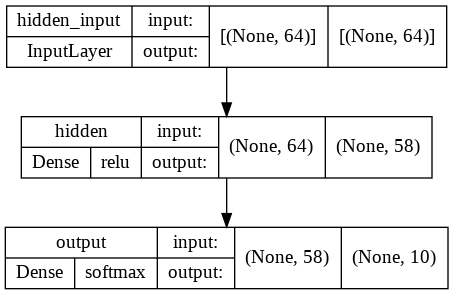

In [266]:
from tensorflow.keras.utils import plot_model

plot_model(model_1, show_shapes=True, show_layer_activations=True)

In [267]:
model_2 = models.Sequential()

if first_population_integers[1] != 0:
  model_2.add(layers.Dense(first_population_integers[1], activation='relu', name='hidden', input_dim=64))
  model_2.add(layers.Dense(10, activation='softmax', name='output'))
else:
  model_2.add(layers.Dense(10, activation='softmax', name='output', input_dim=64))

model_2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [268]:
model_3 = models.Sequential()

if first_population_integers[2] != 0:
  model_3.add(layers.Dense(first_population_integers[2], activation='relu', name='hidden', input_dim=64))
  model_3.add(layers.Dense(10, activation='softmax', name='output'))
else:
  model_3.add(layers.Dense(10, activation='softmax', name='output', input_dim=64))

model_3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [269]:
model_4 = models.Sequential()

if first_population_integers[3] != 0:
  model_4.add(layers.Dense(first_population_integers[3], activation='relu', name='hidden', input_dim=64))
  model_4.add(layers.Dense(10, activation='softmax', name='output'))
else:
  model_4.add(layers.Dense(10, activation='softmax', name='output', input_dim=64))

model_4.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [270]:
model_5 = models.Sequential()

if first_population_integers[4] != 0:
  model_5.add(layers.Dense(first_population_integers[4], activation='relu', name='hidden', input_dim=64))
  model_5.add(layers.Dense(10, activation='softmax', name='output'))
else:
  model_5.add(layers.Dense(10, activation='softmax', name='output', input_dim=64))

model_5.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [271]:
model_6 = models.Sequential()

if first_population_integers[5] != 0:
  model_6.add(layers.Dense(first_population_integers[5], activation='relu', name='hidden', input_dim=64))
  model_6.add(layers.Dense(10, activation='softmax', name='output'))
else:
  model_6.add(layers.Dense(10, activation='softmax', name='output', input_dim=64))

model_6.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

---

# **4. Downloading dataset -> preprocessing**

---

In [272]:
from sklearn.datasets import load_digits

In [273]:
input, targets = load_digits(return_X_y=True)

print(input.shape)

(1797, 64)


In [274]:
from sklearn.preprocessing import MinMaxScaler

In [275]:
MinMaxScaler(copy=False).fit_transform(input)

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [276]:
from tensorflow.keras.utils import to_categorical

targets = to_categorical(targets) # for instance -> [0,1,0,0,0,0,0,0,0,0] -> number 1 and so on...

targets

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

---

# **5. Dividing dataset into train and test** 

---

In [277]:
from sklearn.model_selection import train_test_split

In [278]:
input_train, input_test, targets_train, targets_test = train_test_split(input, targets, test_size=0.25, stratify=targets, random_state=42)

input_train.shape, input_test.shape, targets_train.shape, targets_test.shape

((1347, 64), (450, 64), (1347, 10), (450, 10))

---

# **6. Fit models**

---

In [279]:
n_epochs = 15

In [280]:
fit_1 = model_1.fit(input_train, targets_train, epochs=n_epochs, validation_data=(input_test, targets_test))

Epoch 1/15
43/43 [==============================] - 1s 7ms/step - loss: 1.9341 - accuracy: 0.4722 - val_loss: 1.6196 - val_accuracy: 0.7489
Epoch 2/15
43/43 [==============================] - 0s 3ms/step - loss: 1.4138 - accuracy: 0.8174 - val_loss: 1.1838 - val_accuracy: 0.8289
Epoch 3/15
43/43 [==============================] - 0s 3ms/step - loss: 1.0265 - accuracy: 0.8738 - val_loss: 0.8621 - val_accuracy: 0.8711
Epoch 4/15
43/43 [==============================] - 0s 3ms/step - loss: 0.7441 - accuracy: 0.8968 - val_loss: 0.6424 - val_accuracy: 0.8911
Epoch 5/15
43/43 [==============================] - 0s 5ms/step - loss: 0.5615 - accuracy: 0.9161 - val_loss: 0.5081 - val_accuracy: 0.8933
Epoch 6/15
43/43 [==============================] - 0s 3ms/step - loss: 0.4391 - accuracy: 0.9280 - val_loss: 0.4078 - val_accuracy: 0.9222
Epoch 7/15
43/43 [==============================] - 0s 3ms/step - loss: 0.3538 - accuracy: 0.9347 - val_loss: 0.3555 - val_accuracy: 0.9289
Epoch 8/15
43/43 [==

In [281]:
fit_2 = model_2.fit(input_train, targets_train, epochs=n_epochs, validation_data=(input_test, targets_test))

Epoch 1/15
43/43 [==============================] - 1s 8ms/step - loss: 2.0366 - accuracy: 0.3794 - val_loss: 1.7524 - val_accuracy: 0.6133
Epoch 2/15
43/43 [==============================] - 0s 3ms/step - loss: 1.5382 - accuracy: 0.7186 - val_loss: 1.3240 - val_accuracy: 0.8200
Epoch 3/15
43/43 [==============================] - 0s 3ms/step - loss: 1.1477 - accuracy: 0.8263 - val_loss: 1.0042 - val_accuracy: 0.8200
Epoch 4/15
43/43 [==============================] - 0s 4ms/step - loss: 0.8518 - accuracy: 0.8738 - val_loss: 0.7528 - val_accuracy: 0.8778
Epoch 5/15
43/43 [==============================] - 0s 3ms/step - loss: 0.6421 - accuracy: 0.8968 - val_loss: 0.5810 - val_accuracy: 0.8933
Epoch 6/15
43/43 [==============================] - 0s 3ms/step - loss: 0.4936 - accuracy: 0.9117 - val_loss: 0.4637 - val_accuracy: 0.9133
Epoch 7/15
43/43 [==============================] - 0s 3ms/step - loss: 0.3953 - accuracy: 0.9317 - val_loss: 0.3930 - val_accuracy: 0.9089
Epoch 8/15
43/43 [==

In [282]:
fit_3 = model_3.fit(input_train, targets_train, epochs=n_epochs, validation_data=(input_test, targets_test))

Epoch 1/15
43/43 [==============================] - 1s 7ms/step - loss: 2.1833 - accuracy: 0.2146 - val_loss: 1.9616 - val_accuracy: 0.4378
Epoch 2/15
43/43 [==============================] - 0s 3ms/step - loss: 1.8008 - accuracy: 0.6036 - val_loss: 1.6314 - val_accuracy: 0.6600
Epoch 3/15
43/43 [==============================] - 0s 3ms/step - loss: 1.4632 - accuracy: 0.7454 - val_loss: 1.3040 - val_accuracy: 0.7711
Epoch 4/15
43/43 [==============================] - 0s 3ms/step - loss: 1.1598 - accuracy: 0.8166 - val_loss: 1.0271 - val_accuracy: 0.8111
Epoch 5/15
43/43 [==============================] - 0s 3ms/step - loss: 0.9126 - accuracy: 0.8567 - val_loss: 0.8272 - val_accuracy: 0.8422
Epoch 6/15
43/43 [==============================] - 0s 4ms/step - loss: 0.7334 - accuracy: 0.8857 - val_loss: 0.6698 - val_accuracy: 0.8889
Epoch 7/15
43/43 [==============================] - 0s 3ms/step - loss: 0.5981 - accuracy: 0.9035 - val_loss: 0.5561 - val_accuracy: 0.8978
Epoch 8/15
43/43 [==

In [283]:
fit_4 = model_4.fit(input_train, targets_train, epochs=n_epochs, validation_data=(input_test, targets_test))

Epoch 1/15
43/43 [==============================] - 1s 7ms/step - loss: 2.2694 - accuracy: 0.1247 - val_loss: 2.1632 - val_accuracy: 0.2067
Epoch 2/15
43/43 [==============================] - 0s 3ms/step - loss: 2.0612 - accuracy: 0.3356 - val_loss: 1.9759 - val_accuracy: 0.4222
Epoch 3/15
43/43 [==============================] - 0s 4ms/step - loss: 1.8766 - accuracy: 0.4915 - val_loss: 1.7970 - val_accuracy: 0.5578
Epoch 4/15
43/43 [==============================] - 0s 3ms/step - loss: 1.6999 - accuracy: 0.6088 - val_loss: 1.6221 - val_accuracy: 0.6422
Epoch 5/15
43/43 [==============================] - 0s 3ms/step - loss: 1.5259 - accuracy: 0.6845 - val_loss: 1.4547 - val_accuracy: 0.7267
Epoch 6/15
43/43 [==============================] - 0s 3ms/step - loss: 1.3600 - accuracy: 0.7402 - val_loss: 1.2940 - val_accuracy: 0.7533
Epoch 7/15
43/43 [==============================] - 0s 3ms/step - loss: 1.2005 - accuracy: 0.7921 - val_loss: 1.1434 - val_accuracy: 0.7778
Epoch 8/15
43/43 [==

In [284]:
fit_5 = model_5.fit(input_train, targets_train, epochs=n_epochs, validation_data=(input_test, targets_test))

Epoch 1/15
43/43 [==============================] - 1s 7ms/step - loss: 2.2552 - accuracy: 0.2272 - val_loss: 2.1014 - val_accuracy: 0.3044
Epoch 2/15
43/43 [==============================] - 0s 3ms/step - loss: 1.9500 - accuracy: 0.4172 - val_loss: 1.8252 - val_accuracy: 0.4844
Epoch 3/15
43/43 [==============================] - 0s 3ms/step - loss: 1.6739 - accuracy: 0.5746 - val_loss: 1.5515 - val_accuracy: 0.6333
Epoch 4/15
43/43 [==============================] - 0s 3ms/step - loss: 1.4032 - accuracy: 0.6993 - val_loss: 1.2928 - val_accuracy: 0.7444
Epoch 5/15
43/43 [==============================] - 0s 3ms/step - loss: 1.1606 - accuracy: 0.8018 - val_loss: 1.0744 - val_accuracy: 0.8022
Epoch 6/15
43/43 [==============================] - 0s 2ms/step - loss: 0.9604 - accuracy: 0.8471 - val_loss: 0.8935 - val_accuracy: 0.8644
Epoch 7/15
43/43 [==============================] - 0s 3ms/step - loss: 0.7984 - accuracy: 0.8805 - val_loss: 0.7552 - val_accuracy: 0.8711
Epoch 8/15
43/43 [==

In [285]:
fit_6 = model_6.fit(input_train, targets_train, epochs=n_epochs, validation_data=(input_test, targets_test))

Epoch 1/15
43/43 [==============================] - 1s 7ms/step - loss: 2.1001 - accuracy: 0.2992 - val_loss: 1.8862 - val_accuracy: 0.5200
Epoch 2/15
43/43 [==============================] - 0s 3ms/step - loss: 1.7499 - accuracy: 0.6199 - val_loss: 1.5939 - val_accuracy: 0.7044
Epoch 3/15
43/43 [==============================] - 0s 3ms/step - loss: 1.4614 - accuracy: 0.7654 - val_loss: 1.3181 - val_accuracy: 0.8333
Epoch 4/15
43/43 [==============================] - 0s 3ms/step - loss: 1.1928 - accuracy: 0.8404 - val_loss: 1.0652 - val_accuracy: 0.8756
Epoch 5/15
43/43 [==============================] - 0s 3ms/step - loss: 0.9544 - accuracy: 0.8812 - val_loss: 0.8618 - val_accuracy: 0.8978
Epoch 6/15
43/43 [==============================] - 0s 3ms/step - loss: 0.7605 - accuracy: 0.9027 - val_loss: 0.6960 - val_accuracy: 0.8933
Epoch 7/15
43/43 [==============================] - 0s 3ms/step - loss: 0.6108 - accuracy: 0.9131 - val_loss: 0.5785 - val_accuracy: 0.9133
Epoch 8/15
43/43 [==

---

# **7. Genetic part and very first new sizes population**

---

In [286]:
def fitness_function(fit_1, fit_2, fit_3, fit_4, fit_5, fit_6):
  fitness_list = []

  model_1_loss = sum(fit_1.history['loss'])
  model_2_loss = sum(fit_2.history['loss'])
  model_3_loss = sum(fit_3.history['loss'])
  model_4_loss = sum(fit_4.history['loss'])
  model_5_loss = sum(fit_5.history['loss'])
  model_6_loss = sum(fit_6.history['loss'])

  fitness_list.append(model_1_loss)
  fitness_list.append(model_2_loss)
  fitness_list.append(model_3_loss)
  fitness_list.append(model_4_loss)
  fitness_list.append(model_5_loss)
  fitness_list.append(model_6_loss)

  return fitness_list

In [287]:
fitness_list = fitness_function(fit_1, fit_2, fit_3, fit_4, fit_5, fit_6)

print("model 1 loss: " + str(fitness_list[0]))
print("model 2 loss: " + str(fitness_list[1]))
print("model 3 loss: " + str(fitness_list[2]))
print("model 4 loss: " + str(fitness_list[3]))
print("model 5 loss: " + str(fitness_list[4]))
print("model 6 loss: " + str(fitness_list[5]))

norm = [float(i)/max(fitness_list) for i in fitness_list]

norm = [1 - i for i in norm]

av = (fitness_list[0] + fitness_list[1] + fitness_list[2] + fitness_list[3] + fitness_list[4] + fitness_list[5]) / 6.0
print("average models loss: " + str(av))

print("first population integers:")
print(first_population_integers)

print("1 - normalized fitnesses:")
print(norm)

model 1 loss: 8.120949909090996
model 2 loss: 8.832607686519623
model 3 loss: 11.390152722597122
model 4 loss: 17.778234094381332
model 5 loss: 13.804473102092743
model 6 loss: 11.43119104206562
average models loss: 11.892934759457907
first population integers:
[58, 54, 35, 12, 23, 37]
1 - normalized fitnesses:
[0.5432082924559106, 0.50317856995082, 0.35932035419665853, 0.0, 0.2235183185907348, 0.35701200797674526]


In [288]:
def calculate_probability_of_occurrence(fitness_list):
    sum = 0.0

    probabilities_list = []

    for i in fitness_list:
        sum += i

    for i in range(len(fitness_list)):
        probabilities_list.append(math.floor(fitness_list[i] / sum * 100))

    return probabilities_list

In [289]:
probabilities_list = calculate_probability_of_occurrence(norm)

probabilities_list

[27, 25, 18, 0, 11, 17]

In [290]:
def generate_list_of_probabilities(probabilities_list, population_integers):
    long_list = []

    for i in range(len(population_integers)):
        for j in range(probabilities_list[i]):
            long_list.append(population_integers[i])

    return long_list

In [291]:
long_list = generate_list_of_probabilities(probabilities_list, first_population_integers)

print(*long_list)

58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 23 23 23 23 23 23 23 23 23 23 23 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37


In [292]:
def crossover(first_parent, second_parent):
    start_to_middle_len = random.randint(1, chromosome_length - 1)

    middle_to_end_len = chromosome_length - start_to_middle_len

    child = []

    for i in range(start_to_middle_len):
        child.append(first_parent[i])

    for i in range(middle_to_end_len):
        child.append(second_parent[i + start_to_middle_len])

    return child

In [293]:
def mutation(child):
    for i in range(len(child)):
        if random.random() < 0.1:
            if child[i] == '0':
                # print('0->1 at index: ' + str(i))
                child[i] = '1'
                break
            else:
                # print('1->0 at index: ' + str(i))
                child[i] = '0'
                break

    return ''.join(child)

In [294]:
def generate_new_population(long_list):
    new_population = []
    for i in range(6):
        first_parent = random.choice(long_list)
        second_parent = random.choice(long_list)

        while first_parent == second_parent:
          second_parent = random.choice(long_list)

        child = crossover(map[first_parent], map[second_parent])
        new_population.append(mutation(child))
    return new_population

In [295]:
new_population_strings = generate_new_population(long_list)

new_population_integers = []

for i in range(6):
  new_population_integers.append(int(new_population_strings[i], 2))

print(new_population_strings)
print(new_population_integers)

map.clear()

for i in range(6):
  map[new_population_integers[i]] = new_population_strings[i]

print(map)

['111010', '111011', '100001', '111110', '110111', '110110']
[58, 59, 33, 62, 55, 54]
{58: '111010', 59: '111011', 33: '100001', 62: '111110', 55: '110111', 54: '110110'}


---

# **8. Loop while?... -> just n iterations**

---

In [296]:
n_iterations = 0

new_population_integers_loop = new_population_integers

while n_iterations < 3:
  # MODEL 1
  model_1_loop = models.Sequential()

  if new_population_integers_loop[0] != 0:
    model_1_loop.add(layers.Dense(new_population_integers_loop[0], activation='relu', name='hidden', input_dim=64))
    model_1_loop.add(layers.Dense(10, activation='softmax', name='output'))
  else:
    model_1_loop.add(layers.Dense(10, activation='softmax', name='output', input_dim=64))

  model_1_loop.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

  # MODEL 2
  model_2_loop = models.Sequential()

  if new_population_integers_loop[1] != 0:
    model_2_loop.add(layers.Dense(new_population_integers_loop[1], activation='relu', name='hidden', input_dim=64))
    model_2_loop.add(layers.Dense(10, activation='softmax', name='output'))
  else:
    model_2_loop.add(layers.Dense(10, activation='softmax', name='output', input_dim=64))

  model_2_loop.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

  # MODEL 3
  model_3_loop = models.Sequential()

  if new_population_integers_loop[2] != 0:
    model_3_loop.add(layers.Dense(new_population_integers_loop[2], activation='relu', name='hidden', input_dim=64))
    model_3_loop.add(layers.Dense(10, activation='softmax', name='output'))
  else:
    model_3_loop.add(layers.Dense(10, activation='softmax', name='output', input_dim=64))

  model_3_loop.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

  # MODEL 4
  model_4_loop = models.Sequential()

  if new_population_integers_loop[3] != 0:
    model_4_loop.add(layers.Dense(new_population_integers_loop[3], activation='relu', name='hidden', input_dim=64))
    model_4_loop.add(layers.Dense(10, activation='softmax', name='output'))
  else:
    model_4_loop.add(layers.Dense(10, activation='softmax', name='output', input_dim=64))

  model_4_loop.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

  # MODEL 5
  model_5_loop = models.Sequential()

  if new_population_integers_loop[4] != 0:
    model_5_loop.add(layers.Dense(new_population_integers_loop[4], activation='relu', name='hidden', input_dim=64))
    model_5_loop.add(layers.Dense(10, activation='softmax', name='output'))
  else:
    model_5_loop.add(layers.Dense(10, activation='softmax', name='output', input_dim=64))

  model_5_loop.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

  # MODEL 6
  model_6_loop = models.Sequential()

  if new_population_integers_loop[5] != 0:
    model_6_loop.add(layers.Dense(new_population_integers_loop[5], activation='relu', name='hidden', input_dim=64))
    model_6_loop.add(layers.Dense(10, activation='softmax', name='output'))
  else:
    model_6_loop.add(layers.Dense(10, activation='softmax', name='output', input_dim=64))

  model_6_loop.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

  # FITTING ALL MODELS
  fit_1_loop = model_1_loop.fit(input_train, targets_train, epochs=n_epochs, validation_data=(input_test, targets_test))
  fit_2_loop = model_2_loop.fit(input_train, targets_train, epochs=n_epochs, validation_data=(input_test, targets_test))
  fit_3_loop = model_3_loop.fit(input_train, targets_train, epochs=n_epochs, validation_data=(input_test, targets_test))
  fit_4_loop = model_4_loop.fit(input_train, targets_train, epochs=n_epochs, validation_data=(input_test, targets_test))
  fit_5_loop = model_5_loop.fit(input_train, targets_train, epochs=n_epochs, validation_data=(input_test, targets_test))
  fit_6_loop = model_6_loop.fit(input_train, targets_train, epochs=n_epochs, validation_data=(input_test, targets_test))

  # CALCULATING FITNESS FOR EVERY MODEL
  fitness_list_loop = fitness_function(fit_1_loop, fit_2_loop, fit_3_loop, fit_4_loop, fit_5_loop, fit_6_loop)

  # PRINTING LOSS SUM OF EVERY MODEL
  model_1_loss = fitness_list_loop[0]
  model_2_loss = fitness_list_loop[1]
  model_3_loss = fitness_list_loop[2]
  model_4_loss = fitness_list_loop[3]
  model_5_loss = fitness_list_loop[4]
  model_6_loss = fitness_list_loop[5]

  print("loop iteration " + str(n_iterations + 1) + ":")
  print("------------------------------------")
  print("models sizes: " + str(new_population_integers_loop) + '\n')
  print("model 1 loss: " + str(model_1_loss))
  print("model 2 loss: " + str(model_2_loss))
  print("model 3 loss: " + str(model_3_loss))
  print("model 4 loss: " + str(model_4_loss))
  print("model 5 loss: " + str(model_5_loss))
  print("model 6 loss: " + str(model_6_loss))

  # CALCULATING AVERAGE MODELS LOSS
  average = (model_1_loss + model_2_loss + model_3_loss + model_4_loss + model_5_loss + model_6_loss) / 6.0
  print("average models loss: " + str(average))

  print()

  # FITNESS LIST NORMALIZATION
  norm_loop = [float(i)/max(fitness_list_loop) for i in fitness_list_loop]
  norm_loop = [1 - i for i in norm_loop]

  # PROBABILITIES LIST
  probabilities_list_loop = calculate_probability_of_occurrence(norm_loop)
  
  # WE WILL RANDOMLY TAKE PARENTS FROM THIS LIST
  long_list_loop = generate_list_of_probabilities(probabilities_list_loop, new_population_integers_loop)

  # GENERATING NEW POPULATION
  new_population_strings_loop = generate_new_population(long_list_loop)
  new_population_integers_loop = []

  for i in range(6):
    new_population_integers_loop.append(int(new_population_strings_loop[i], 2))

  print("new population strings:")
  print(new_population_strings_loop)

  print("new population integeers:")
  print(new_population_integers_loop)

  map.clear()

  for i in range(6):
    map[new_population_integers_loop[i]] = new_population_strings_loop[i]

  print("map:")
  print(map)

  print("------------------------------------")

  n_iterations += 1

Epoch 1/15
43/43 [==============================] - 2s 7ms/step - loss: 2.0783 - accuracy: 0.3816 - val_loss: 1.8079 - val_accuracy: 0.5489
Epoch 2/15
43/43 [==============================] - 0s 3ms/step - loss: 1.6026 - accuracy: 0.6852 - val_loss: 1.3830 - val_accuracy: 0.7711
Epoch 3/15
43/43 [==============================] - 0s 3ms/step - loss: 1.2043 - accuracy: 0.8270 - val_loss: 1.0338 - val_accuracy: 0.8467
Epoch 4/15
43/43 [==============================] - 0s 3ms/step - loss: 0.8945 - accuracy: 0.8753 - val_loss: 0.7841 - val_accuracy: 0.8778
Epoch 5/15
43/43 [==============================] - 0s 4ms/step - loss: 0.6782 - accuracy: 0.9013 - val_loss: 0.6225 - val_accuracy: 0.8867
Epoch 6/15
43/43 [==============================] - 0s 3ms/step - loss: 0.5343 - accuracy: 0.9161 - val_loss: 0.4996 - val_accuracy: 0.9156
Epoch 7/15
43/43 [==============================] - 0s 3ms/step - loss: 0.4299 - accuracy: 0.9243 - val_loss: 0.4149 - val_accuracy: 0.9200
Epoch 8/15
43/43 [==